In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

from prophet import Prophet

In [13]:
#read the data
df = pd.read_csv("DailyData.csv", parse_dates=['date'], delimiter=',')

In [14]:
#check the dtypes
print(df.dtypes)

campaign name                           object
date                            datetime64[ns]
clicks                                   int64
impressions                              int64
cost_micros                              int64
bidding_strategy_type                   object
conversions                            float64
cost_per_conversion                    float64
Click-through rate (CTR)               float64
average cost per click (CPC)           float64
cost-per-acquisition (CPA)             float64
Cost                                   float64
conversion per euro                    float64
dtype: object


In [15]:
df['date'] = pd.to_datetime(df.date , format = '%d/%m/%Y %H.%M.%S')

In [16]:
df.head(3)

campaign name       date  clicks  impressions  \
0  SHOPTIMISED PMax-46 - all products-M 2023-11-28       0           33   
1  SHOPTIMISED PMax-46 - all products-M 2023-11-29      11         1139   
2  SHOPTIMISED PMax-46 - all products-M 2023-11-30       7          655   

   cost_micros      bidding_strategy_type  conversions  cost_per_conversion  \
0            0  MAXIMIZE_CONVERSION_VALUE          0.0                  NaN   
1      4060000  MAXIMIZE_CONVERSION_VALUE          1.0            4060000.0   
2      1430000  MAXIMIZE_CONVERSION_VALUE          0.0                  NaN   

   Click-through rate (CTR)  average cost per click (CPC)  \
0                  0.000000                      0.000000   
1                  0.965759                      0.369091   
2                  1.068702                      0.204286   

   cost-per-acquisition (CPA)  Cost  conversion per euro  
0                    0.000000  0.00             0.000000  
1                    4.060000  4.06             0.246305  
2                    4.085714  1.43             0.000000

In [17]:
df.drop(['campaign name','clicks','impressions','cost_micros','bidding_strategy_type','cost_per_conversion','Click-through rate (CTR)','average cost per click (CPC)','cost-per-acquisition (CPA)','conversion per euro'],axis=1, inplace=True)

In [18]:
df.head(5)

date  conversions   Cost
0 2023-11-28     0.000000   0.00
1 2023-11-29     1.000000   4.06
2 2023-11-30     0.000000   1.43
3 2023-12-01     0.000000   2.64
4 2023-12-02     3.332276  10.51

## conversion

In [19]:
conv =df.rename(columns={'date': 'ds', 'conversions': 'y'})

In [20]:
#creating the train and validation set
train = conv[:int(0.8*(len(conv)))]
valid = conv[int(0.8*(len(conv))):]

In [21]:
train.dtypes

ds      datetime64[ns]
y              float64
Cost           float64
dtype: object

In [22]:
train.head(5)

ds         y   Cost
0 2023-11-28  0.000000   0.00
1 2023-11-29  1.000000   4.06
2 2023-11-30  0.000000   1.43
3 2023-12-01  0.000000   2.64
4 2023-12-02  3.332276  10.51

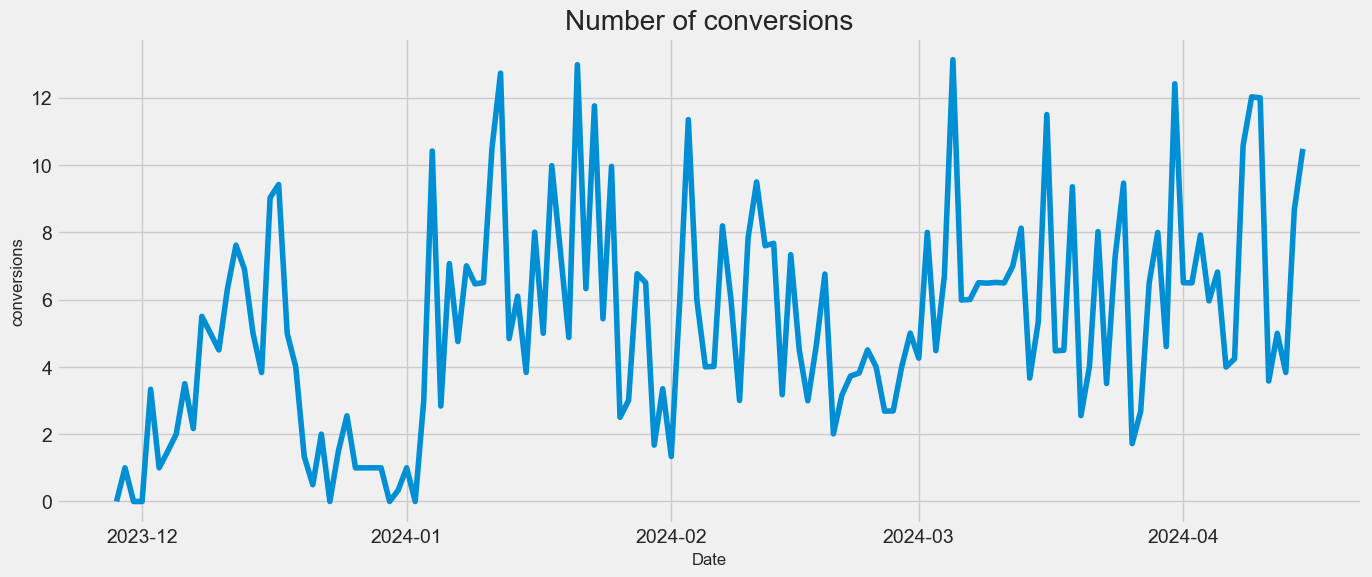

In [23]:
plt.figure(figsize = (15, 6))
plt.plot(train['ds'], train['y'])
plt.xlabel('Date', {'fontsize': 12})
plt.ylabel('conversions', {'fontsize': 12})
plt.title('Number of conversions')
plt.show()

In [24]:
#fit the model
model = Prophet()
model.add_regressor('Cost')
model.fit(train)

17:42:41 - cmdstanpy - INFO - Chain [1] start processing
17:42:41 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
valid_predict=model.predict(valid.drop('y',axis=1))

In [27]:
predicted=pd.DataFrame()
predicted['date']=valid_predict.ds
predicted['conversions']=valid_predict.yhat
predicted['cost']=valid_predict.Cost

In [28]:
actual=pd.DataFrame()
actual['date']=valid.ds
actual['conversions']=valid.y
actual['cost']=valid.Cost

In [29]:
actual.set_index(actual.date,inplace=True)
predicted.set_index(predicted.date,inplace=True)
actual

date  conversions       cost
date                                         
2024-04-16 2024-04-16    10.079527  54.800000
2024-04-17 2024-04-17     4.868349  38.325701
2024-04-18 2024-04-18     9.134768  56.074287
2024-04-19 2024-04-19     6.891433  48.527914
2024-04-20 2024-04-20     6.016440  54.936154
2024-04-21 2024-04-21     5.166667  53.621576
2024-04-22 2024-04-22     4.321665  50.848553
2024-04-23 2024-04-23     6.358181  50.670000
2024-04-24 2024-04-24     4.522599  30.221460
2024-04-25 2024-04-25     5.234060  32.140000
2024-04-26 2024-04-26     9.095239  20.221922
2024-04-27 2024-04-27    10.127772  41.900000
2024-04-28 2024-04-28     4.161246  30.138628
2024-04-29 2024-04-29     4.998920  27.270000
2024-04-30 2024-04-30     4.000000  22.801087
2024-05-01 2024-05-01     1.000000  20.540000
2024-05-02 2024-05-02     3.002452  29.466921
2024-05-03 2024-05-03     6.543285  20.342796
2024-05-04 2024-05-04     1.250000  14.450000
2024-05-05 2024-05-05     4.333333  28.510000
2024-05-06 2024-05-06     3.004196  19.310000
2024-05-07 2024-05-07     3.404269  18.680000
2024-05-08 2024-05-08     3.061707  22.925110
2024-05-09 2024-05-09     1.000000  17.015897
2024-05-10 2024-05-10     3.000000  24.500815
2024-05-11 2024-05-11     2.000000  17.670090
2024-05-12 2024-05-12     2.000000  26.224621
2024-05-13 2024-05-13     3.000000  21.517871
2024-05-14 2024-05-14     1.333334   5.520000
2024-05-15 2024-05-15     5.000000  31.000000
2024-05-16 2024-05-16     2.915050  20.450000
2024-05-17 2024-05-17     1.100247  22.870000
2024-05-18 2024-05-18     0.501860  22.490000
2024-05-19 2024-05-19     2.835140  22.150000
2024-05-20 2024-05-20     1.000000  18.470000
2024-05-21 2024-05-21     3.495456  21.190000

In [31]:
predicted

date  conversions      cost
date                                        
2024-04-16 2024-04-16     7.904940  2.575770
2024-04-17 2024-04-17     5.029098  0.615920
2024-04-18 2024-04-18     7.577363  2.727365
2024-04-19 2024-04-19     6.381576  1.829617
2024-04-20 2024-04-20     7.312640  2.591968
2024-04-21 2024-04-21     7.718786  2.435580
2024-04-22 2024-04-22     7.238984  2.105690
2024-04-23 2024-04-23     7.370983  2.084449
2024-04-24 2024-04-24     4.022349 -0.348193
2024-04-25 2024-04-25     4.687408 -0.119956
2024-04-26 2024-04-26     2.971544 -1.537779
2024-04-27 2024-04-27     5.719171  1.041133
2024-04-28 2024-04-28     4.882523 -0.358047
2024-04-29 2024-04-29     4.391348 -0.699311
2024-04-30 2024-04-30     4.012948 -1.230951
2024-05-01 2024-05-01     2.827968 -1.499940
2024-05-02 2024-05-02     4.326772 -0.437956
2024-05-03 2024-05-03     2.943289 -1.523400
2024-05-04 2024-05-04     2.410971 -2.224431
2024-05-05 2024-05-05     4.646140 -0.551796
2024-05-06 2024-05-06     3.401759 -1.646265
2024-05-07 2024-05-07     3.480052 -1.721213
2024-05-08 2024-05-08     3.069076 -1.216197
2024-05-09 2024-05-09     2.802913 -1.919181
2024-05-10 2024-05-10     3.395309 -1.028745
2024-05-11 2024-05-11     2.751411 -1.841356
2024-05-12 2024-05-12     4.331627 -0.823674
2024-05-13 2024-05-13     3.621781 -1.383608
2024-05-14 2024-05-14     1.871849 -3.286780
2024-05-15 2024-05-15     3.987063 -0.255575
2024-05-16 2024-05-16     3.168813 -1.510646
2024-05-17 2024-05-17     3.158666 -1.222753
2024-05-18 2024-05-18     3.282173 -1.267960
2024-05-19 2024-05-19     3.804258 -1.308407
2024-05-20 2024-05-20     3.216559 -1.746195
2024-05-21 2024-05-21     3.693382 -1.422613

In [33]:
#Combine the actual result and predicted result side by side
result=pd.DataFrame()

result['Actual Conversions']=actual['conversions']
result['PredictedConversions']=predicted['conversions']

result['Actual Cost']=actual['cost']
result['Predicted Cost']=predicted['cost']


In [35]:
result.tail(30)

Actual Conversions  PredictedConversions  Actual Cost  \
date                                                                
2024-04-22            4.321665              7.238984    50.848553   
2024-04-23            6.358181              7.370983    50.670000   
2024-04-24            4.522599              4.022349    30.221460   
2024-04-25            5.234060              4.687408    32.140000   
2024-04-26            9.095239              2.971544    20.221922   
2024-04-27           10.127772              5.719171    41.900000   
2024-04-28            4.161246              4.882523    30.138628   
2024-04-29            4.998920              4.391348    27.270000   
2024-04-30            4.000000              4.012948    22.801087   
2024-05-01            1.000000              2.827968    20.540000   
2024-05-02            3.002452              4.326772    29.466921   
2024-05-03            6.543285              2.943289    20.342796   
2024-05-04            1.250000              2.410971    14.450000   
2024-05-05            4.333333              4.646140    28.510000   
2024-05-06            3.004196              3.401759    19.310000   
2024-05-07            3.404269              3.480052    18.680000   
2024-05-08            3.061707              3.069076    22.925110   
2024-05-09            1.000000              2.802913    17.015897   
2024-05-10            3.000000              3.395309    24.500815   
2024-05-11            2.000000              2.751411    17.670090   
2024-05-12            2.000000              4.331627    26.224621   
2024-05-13            3.000000              3.621781    21.517871   
2024-05-14            1.333334              1.871849     5.520000   
2024-05-15            5.000000              3.987063    31.000000   
2024-05-16            2.915050              3.168813    20.450000   
2024-05-17            1.100247              3.158666    22.870000   
2024-05-18            0.501860              3.282173    22.490000   
2024-05-19            2.835140              3.804258    22.150000   
2024-05-20            1.000000              3.216559    18.470000   
2024-05-21            3.495456              3.693382    21.190000   

            Predicted Cost  
date                        
2024-04-22        2.105690  
2024-04-23        2.084449  
2024-04-24       -0.348193  
2024-04-25       -0.119956  
2024-04-26       -1.537779  
2024-04-27        1.041133  
2024-04-28       -0.358047  
2024-04-29       -0.699311  
2024-04-30       -1.230951  
2024-05-01       -1.499940  
2024-05-02       -0.437956  
2024-05-03       -1.523400  
2024-05-04       -2.224431  
2024-05-05       -0.551796  
2024-05-06       -1.646265  
2024-05-07       -1.721213  
2024-05-08       -1.216197  
2024-05-09       -1.919181  
2024-05-10       -1.028745  
2024-05-11       -1.841356  
2024-05-12       -0.823674  
2024-05-13       -1.383608  
2024-05-14       -3.286780  
2024-05-15       -0.255575  
2024-05-16       -1.510646  
2024-05-17       -1.222753  
2024-05-18       -1.267960  
2024-05-19       -1.308407  
2024-05-20       -1.746195  
2024-05-21       -1.422613

In [50]:
finalModel = Prophet()
finalModel.add_regressor('Cost')
finalModel.fit(conv)

17:54:36 - cmdstanpy - INFO - Chain [1] start processing
17:54:36 - cmdstanpy - INFO - Chain [1] done processing


In [57]:
future = finalModel.make_future_dataframe(periods=10)
future['Cost']=20
future.tail(15)

ds  Cost
171 2024-05-17    20
172 2024-05-18    20
173 2024-05-19    20
174 2024-05-20    20
175 2024-05-21    20
176 2024-05-22    20
177 2024-05-23    20
178 2024-05-24    20
179 2024-05-25    20
180 2024-05-26    20
181 2024-05-27    20
182 2024-05-28    20
183 2024-05-29    20
184 2024-05-30    20
185 2024-05-31    20

In [58]:
finalPrediction=model.predict(future)

In [59]:
finalPrediction.tail(15)

ds     trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
171 2024-05-17  4.726814   -0.174636    5.713907     4.726718     4.726918   
172 2024-05-18  4.720723   -0.167994    6.415171     4.720622     4.720832   
173 2024-05-19  4.714633    0.498086    6.706154     4.714527     4.714745   
174 2024-05-20  4.708542    0.201881    6.935841     4.708432     4.708660   
175 2024-05-21  4.702451    0.292848    6.646278     4.702338     4.702574   
176 2024-05-22  4.696360   -0.530709    5.722371     4.696243     4.696488   
177 2024-05-23  4.690270   -0.039587    6.199706     4.690147     4.690402   
178 2024-05-24  4.684179   -0.541502    5.981247     4.684052     4.684316   
179 2024-05-25  4.678088   -0.345312    5.858360     4.677959     4.678230   
180 2024-05-26  4.671998    0.304743    6.638433     4.671863     4.672144   
181 2024-05-27  4.665907    0.315833    6.692667     4.665766     4.666060   
182 2024-05-28  4.659816    0.268912    6.709431     4.659672     4.659977   
183 2024-05-29  4.653726   -0.628659    5.834627     4.653574     4.653894   
184 2024-05-30  4.647635   -0.127208    6.077353     4.647479     4.647809   
185 2024-05-31  4.641544   -0.268997    6.110655     4.641382     4.641726   

        Cost  Cost_lower  Cost_upper  additive_terms  ...  \
171 -1.56418    -1.56418    -1.56418       -1.909575  ...   
172 -1.56418    -1.56418    -1.56418       -1.734771  ...   
173 -1.56418    -1.56418    -1.56418       -1.166147  ...   
174 -1.56418    -1.56418    -1.56418       -1.309968  ...   
175 -1.56418    -1.56418    -1.56418       -1.150637  ...   
176 -1.56418    -1.56418    -1.56418       -2.060537  ...   
177 -1.56418    -1.56418    -1.56418       -1.617626  ...   
178 -1.56418    -1.56418    -1.56418       -1.909575  ...   
179 -1.56418    -1.56418    -1.56418       -1.734771  ...   
180 -1.56418    -1.56418    -1.56418       -1.166147  ...   
181 -1.56418    -1.56418    -1.56418       -1.309968  ...   
182 -1.56418    -1.56418    -1.56418       -1.150637  ...   
183 -1.56418    -1.56418    -1.56418       -2.060537  ...   
184 -1.56418    -1.56418    -1.56418       -1.617626  ...   
185 -1.56418    -1.56418    -1.56418       -1.909575  ...   

     extra_regressors_additive  extra_regressors_additive_lower  \
171                   -1.56418                         -1.56418   
172                   -1.56418                         -1.56418   
173                   -1.56418                         -1.56418   
174                   -1.56418                         -1.56418   
175                   -1.56418                         -1.56418   
176                   -1.56418                         -1.56418   
177                   -1.56418                         -1.56418   
178                   -1.56418                         -1.56418   
179                   -1.56418                         -1.56418   
180                   -1.56418                         -1.56418   
181                   -1.56418                         -1.56418   
182                   -1.56418                         -1.56418   
183                   -1.56418                         -1.56418   
184                   -1.56418                         -1.56418   
185                   -1.56418                         -1.56418   

     extra_regressors_additive_upper    weekly  weekly_lower  weekly_upper  \
171                         -1.56418 -0.345395     -0.345395     -0.345395   
172                         -1.56418 -0.170591     -0.170591     -0.170591   
173                         -1.56418  0.398033      0.398033      0.398033   
174                         -1.56418  0.254213      0.254213      0.254213   
175                         -1.56418  0.413544      0.413544      0.413544   
176                         -1.56418 -0.496357     -0.496357     -0.496357   
177                         -1.56418 -0.053446     -0.053446     -0.053446   
178                         -1.56418 -0.345395     -0.345395     -0.345395   
179        

In [115]:
#check rmse
cols = train.columns
from math import sqrt
from sklearn.metrics import mean_squared_error

for i in cols:
    print('rmse value for', i, 'is : ', sqrt(mean_squared_error(prediction_df[i], valid[i])))

rmse value for clicks is :  47.001072038654925
rmse value for impressions is :  4283.773575681952
rmse value for conversions is :  2.64165124528722
rmse value for Click-through rate (CTR) is :  0.12650445033668245
rmse value for average cost per click (CPC) is :  0.08169620262761304
rmse value for cost-per-acquisition (CPA) is :  7.677515349666301
rmse value for Cost is :  12.305461751340538
rmse value for conversion per euro is :  0.08325966036479787


In [116]:
#make final predictions
last_obs = data.values[-optimal_lag:]
model = VAR(endog=data)
model_fit = model.fit()
yhat = model_fit.forecast(last_obs, steps=10)
print(yhat)

[[6.90402555e+01 6.68059440e+03 3.83802504e+00 1.04249138e+00
  2.91549918e-01 7.92714579e+00 1.98124556e+01 2.01152714e-01]
 [7.69083577e+01 7.48790903e+03 3.75597616e+00 1.03626190e+00
  2.84419592e-01 7.42055634e+00 2.16509531e+01 1.94411471e-01]
 [8.36404258e+01 8.07905159e+03 3.97925211e+00 1.03968181e+00
  2.83832613e-01 7.32300432e+00 2.36016953e+01 1.91353935e-01]
 [8.92480961e+01 8.56563318e+03 4.19191475e+00 1.04370299e+00
  2.84280846e-01 7.33537816e+00 2.52662473e+01 1.88736136e-01]
 [9.38812634e+01 8.96869560e+03 4.36969494e+00 1.04711711e+00
  2.84835132e-01 7.36799917e+00 2.66518093e+01 1.86449443e-01]
 [9.76956577e+01 9.30108359e+03 4.51611132e+00 1.04991094e+00
  2.85349561e-01 7.40033061e+00 2.77965813e+01 1.84510399e-01]
 [1.00832331e+02 9.57456696e+03 4.63653026e+00 1.05220088e+00
  2.85792426e-01 7.42848559e+00 2.87394085e+01 1.82897247e-01]
 [1.03410715e+02 9.79941157e+03 4.73553116e+00 1.05408144e+00
  2.86162863e-01 7.45211305e+00 2.95148916e+01 1.81565679e-01]


C:\Users\Digitweb Sathurjan\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [117]:
#convert the final result to a dataframe
resultFrame=pd.DataFrame(yhat,columns=data.columns)

In [118]:
resultFrame

clicks   impressions  conversions  Click-through rate (CTR)  \
0   69.040256   6680.594398     3.838025                  1.042491   
1   76.908358   7487.909028     3.755976                  1.036262   
2   83.640426   8079.051588     3.979252                  1.039682   
3   89.248096   8565.633183     4.191915                  1.043703   
4   93.881263   8968.695604     4.369695                  1.047117   
5   97.695658   9301.083592     4.516111                  1.049911   
6  100.832331   9574.566955     4.636530                  1.052201   
7  103.410715   9799.411573     4.735531                  1.054081   
8  105.529894   9984.222033     4.816907                  1.055627   
9  107.271566  10136.113682     4.883788                  1.056897   

   average cost per click (CPC)  cost-per-acquisition (CPA)       Cost  \
0                      0.291550                    7.927146  19.812456   
1                      0.284420                    7.420556  21.650953   
2                      0.283833                    7.323004  23.601695   
3                      0.284281                    7.335378  25.266247   
4                      0.284835                    7.367999  26.651809   
5                      0.285350                    7.400331  27.796581   
6                      0.285792                    7.428486  28.739408   
7                      0.286163                    7.452113  29.514892   
8                      0.286469                    7.471682  30.152407   
9                      0.286722                    7.487810  30.676399   

   conversion per euro  
0             0.201153  
1             0.194411  
2             0.191354  
3             0.188736  
4             0.186449  
5             0.184510  
6             0.182897  
7             0.181566  
8             0.180470  
9             0.179568

In [119]:
# Generate date range for the forecasted values
date_range = pd.date_range(start=data.index[-1], periods=11)
resultFrame.index = date_range[1:]

In [120]:
resultFrame

clicks   impressions  conversions  Click-through rate (CTR)  \
2024-05-22   69.040256   6680.594398     3.838025                  1.042491   
2024-05-23   76.908358   7487.909028     3.755976                  1.036262   
2024-05-24   83.640426   8079.051588     3.979252                  1.039682   
2024-05-25   89.248096   8565.633183     4.191915                  1.043703   
2024-05-26   93.881263   8968.695604     4.369695                  1.047117   
2024-05-27   97.695658   9301.083592     4.516111                  1.049911   
2024-05-28  100.832331   9574.566955     4.636530                  1.052201   
2024-05-29  103.410715   9799.411573     4.735531                  1.054081   
2024-05-30  105.529894   9984.222033     4.816907                  1.055627   
2024-05-31  107.271566  10136.113682     4.883788                  1.056897   

            average cost per click (CPC)  cost-per-acquisition (CPA)  \
2024-05-22                      0.291550                    7.927146   
2024-05-23                      0.284420                    7.420556   
2024-05-24                      0.283833                    7.323004   
2024-05-25                      0.284281                    7.335378   
2024-05-26                      0.284835                    7.367999   
2024-05-27                      0.285350                    7.400331   
2024-05-28                      0.285792                    7.428486   
2024-05-29                      0.286163                    7.452113   
2024-05-30                      0.286469                    7.471682   
2024-05-31                      0.286722                    7.487810   

                 Cost  conversion per euro  
2024-05-22  19.812456             0.201153  
2024-05-23  21.650953             0.194411  
2024-05-24  23.601695             0.191354  
2024-05-25  25.266247             0.188736  
2024-05-26  26.651809             0.186449  
2024-05-27  27.796581             0.184510  
2024-05-28  28.739408             0.182897  
2024-05-29  29.514892             0.181566  
2024-05-30  30.152407             0.180470  
2024-05-31  30.676399             0.179568